In [1]:
!wget https://object.pouta.csc.fi/OPUS-MIZAN/v1/moses/en-fa.txt.zip
!unzip en-fa.txt.zip


--2024-06-08 13:17:34--  https://object.pouta.csc.fi/OPUS-MIZAN/v1/moses/en-fa.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59234779 (56M) [application/zip]
Saving to: ‘en-fa.txt.zip’

en-fa.txt.zip       100%[===================>]  56.49M  18.0MB/s    in 3.1s    

2024-06-08 13:17:38 (18.0 MB/s) - ‘en-fa.txt.zip’ saved [59234779/59234779]

Archive:  en-fa.txt.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: MIZAN.en-fa.en          
  inflating: MIZAN.en-fa.fa          
  inflating: MIZAN.en-fa.xml         


In [2]:
!pip install fairseq
!pip install sentencepiece
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 19.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_

In [ ]:
!wc -l /content/MIZAN.en-fa.en
!wc -l /content/MIZAN.en-fa.fa


1021597 /content/MIZAN.en-fa.en
1021597 /content/MIZAN.en-fa.fa


In [ ]:
!head /content/MIZAN.en-fa.en -n 3
!head /content/MIZAN.en-fa.fa -n 3

The story which follows was first written out in Paris during the Peace Conference 
from notes jotted daily on the march, strengthened by some reports sent to my chiefs in Cairo. 
Afterwards, in the autumn of 1919, this first draft and some of the notes were lost. 
داستانی که از نظر شما می‌گذرد، ابتدا ضمن کنفرانس صلح پاریس از روی یادداشت‌هائی که به طور روزانه در حال خدمت در صف برداشته شده بودند 
و از روی گزارشاتی که برای رؤسای من در قاهره ارسال گردیده بودند نوشته شد. 
بعدا در پائیز سال 1919، این نوشته اولیه و بعضی از یادداشت‌ها، مفقود شدند. 


In [ ]:
import sentencepiece as spm

# Function to train SentencePiece and tokenize the file
def train_and_tokenize(file_path, model_prefix):
    spm.SentencePieceTrainer.train(input=file_path, model_prefix=model_prefix, vocab_size=8000, character_coverage=1.0, model_type='word')
    sp = spm.SentencePieceProcessor(model_file=f'{model_prefix}.model')
    with open(file_path, 'r') as file:
        lines = file.readlines()
    tokenized_lines = [sp.encode(line, out_type=str) for line in lines]
    token_counts = [len(tokens) for tokens in tokenized_lines]
    return tokenized_lines, token_counts

# Tokenize and create histograms for English and Persian files
tokenized_lines_en, token_counts_en = train_and_tokenize('/content/MIZAN.en-fa.en', 'm_en')
tokenized_lines_fa, token_counts_fa = train_and_tokenize('/content/MIZAN.en-fa.fa', 'm_fa')


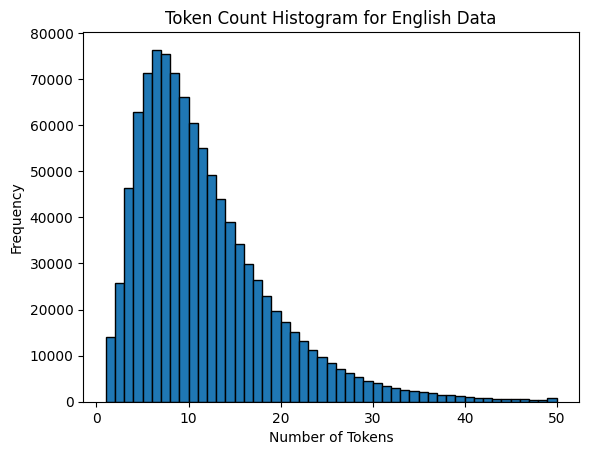

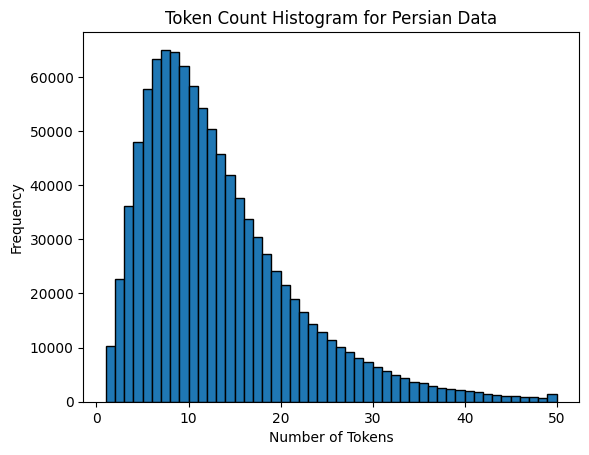

In [ ]:
import matplotlib.pyplot as plt

# Function to plot histograms
def plot_histogram(token_counts, language):
    plt.hist(token_counts, bins=range(1, 51), edgecolor='black')
    plt.title(f'Token Count Histogram for {language} Data')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(token_counts_en, 'English')
plot_histogram(token_counts_fa, 'Persian')

In [ ]:

# Function to filter lines based on token counts
def filter_lines(tokenized_lines, token_counts, min_tokens=10, max_tokens=50):
    filtered_lines = [line for line, count in zip(tokenized_lines, token_counts) if min_tokens <= count <= max_tokens]
    return filtered_lines

# Filter lines for both files
filtered_lines_en = filter_lines(tokenized_lines_en, token_counts_fa)
filtered_lines_fa = filter_lines(tokenized_lines_fa, token_counts_fa)

with open('/content/MIZAN.filtered.en-fa.en', 'w') as file:
    for tokens in filtered_lines_en:
        file.write(' '.join(tokens) + '\n')

with open('/content/MIZAN.filtered.en-fa.fa', 'w') as file:
    for tokens in filtered_lines_fa:
        file.write(' '.join(tokens) + '\n')

print("New number of lines in English dataset:", len(filtered_lines_en))
print("New number of lines in Persian dataset:", len(filtered_lines_fa))

New number of lines in English dataset: 585266
New number of lines in Persian dataset: 585266


In [ ]:
import random

# Function to shuffle and split the dataset
def shuffle_and_split(en_lines, fa_lines, train_size, eval_size, test_size, seed=42):
    combined = list(zip(en_lines, fa_lines))
    random.seed(seed)
    random.shuffle(combined)
    en_lines, fa_lines = zip(*combined)

    train_en, eval_en, test_en = en_lines[:train_size], en_lines[train_size:train_size+eval_size], en_lines[train_size+eval_size:train_size+eval_size+test_size]
    train_fa, eval_fa, test_fa = fa_lines[:train_size], fa_lines[train_size:train_size+eval_size], fa_lines[train_size+eval_size:train_size+eval_size+test_size]

    return (train_en, eval_en, test_en), (train_fa, eval_fa, test_fa)

train_size = 500000
eval_size = 5000
test_size = 10000

# Shuffle and split the datasets
(train_en, eval_en, test_en), (train_fa, eval_fa, test_fa) = shuffle_and_split(filtered_lines_en, filtered_lines_fa, train_size, eval_size, test_size)

# Save the datasets to files
def save_dataset(file_path, lines):
    with open(file_path, 'w') as file:
        for line in lines:
            file.write(' '.join(line) + '\n')

save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/train.en', train_en)
save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/eval.en', eval_en)
save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/test.en', test_en)

save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/train.fa', train_fa)
save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/eval.fa', eval_fa)
save_dataset('/content/drive/MyDrive/datasets/nlp/ca5/test.fa', test_fa)

# Report the number of lines in each new dataset
print("Training set size:", len(train_en))
print("Evaluation set size:", len(eval_en))
print("Test set size:", len(test_en))

Training set size: 500000
Evaluation set size: 5000
Test set size: 10000


In [ ]:
!head /content/drive/MyDrive/datasets/nlp/ca5/train.fa -n 2
!head /content/drive/MyDrive/datasets/nlp/ca5/train.en -n 2


▁مورل ▁آهسته ▁گفت ▁آری ▁گفتی ▁اما ▁این ▁حرف ▁را ▁به ▁غیر ▁از ▁من ▁به ▁دیگری ▁هم ▁گفته ▁ای
▁وقتی ▁قرار ▁است ▁تمام ▁روزت ▁را ▁همراه ▁با ▁دوکی ▁اعظم ▁به ▁تماشای ▁مکس ▁های ▁آبی ▁رنگ ▁بگذرانی؟
▁And ▁did ▁you ▁mention ▁these ▁suspicions ▁to ▁any ▁person ▁beside ▁myself
▁if ▁I ▁have ▁to ▁pass ▁all ▁my ▁mornings ▁watching ▁blue ▁bottles ▁with ▁an ▁Archduke?'
